Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Regression trees: Problem solving

In this session we will look at the `mpg` dataset, which contains measurements of fuel economy and other properties of cars from the 1970s.

Our goal is to predict miles per gallon.

| Variable     | Type     | Description                              |
|:--------------|:----------|:------------------------------------------|
| mpg          | Ratio    | Miles per gallon; fuel economy           |
| cylinders    | Ordinal  | Number of cylinders in engine            |
| displacement | Ratio    | Volume inside cylinders (likely inches)                  |
| horsepower   | Ratio    | Unit of power                            |
| weight       | Ratio    | Weight of car (likely pounds)                           |
| acceleration | Ratio    | Acceleration of car (likely in seconds to 60 MPH) |
| model_year   | Interval | Year of car manufacture; last two digits |
| origin       | Nominal  | Numeric code corresponding to continent  |
| name     | Nominal  | Car model name (ID)                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

## Load data
Start by loading `readr`, `dplyr`, `base`, and `tidyr` so we can read data into a dataframe and manipulate it.

In [11]:
library(readr)
library(dplyr)
library(tidyr)
library(base)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><next><block type="import_R" id="nQn-t+|,sb);=Byd^:Z;"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field></block></next></block></next></block></next></block></xml>

Load `"datasets/mpg.csv"` into a dataframe.

In [9]:
dataframe = readr::read_csv("datasets/mpg.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/mpg.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 398 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (8): mpg, cylinders, displacement, horsepower, weight, acceleration, mod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,4,135,84,2370,13.0,82,1,dodge charger 2.2


Use `base::summary` to check for NA.

In [12]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="=utk,`{DfC9rh8/EHZ`d" x="-252" y="107"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="Oys+HP6vSsx1+D%o(ou+"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration     model_year        origin          name          
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.57   Mean   :76.01   Mean   :1.573                     
 3rd Qu.:17.18   3rd

------------------
**QUESTION:**

Which variables have NA?

**ANSWER: (click here to edit)**

*Only `horsepower`.*

-------------------

Remove the rows with NA from the dataframe.

In [13]:
dataframe = dataframe %>%
    tidyr::drop_na()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="dSd/7cN]dxLi]5aOx*cL" x="-123" y="58"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="WqzxvhEZ*^+:9TR4`k|a"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="pKv|,Z}51#+5@KFVC#?K"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="LK.[Y8CK09Dk/~+7%`L9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value></block></value></block><block type="variables_get" id="Lhzu/}u)m#WNW|B9=Xj$" x="-139" y="188"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,4,135,84,2370,13.0,82,1,dodge charger 2.2


### Explore data

Start by loading `ggplot2`, `psych`, and `corrr` for exploring the data.

In [7]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Get descriptive statistics for the data using `describe`.

In [14]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-260" y="1"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,392,23.445918,7.8050075,22.75,22.991720,8.59908,9,46.6,37.6,0.45360012,-0.5373155,0.39421241
cylinders,2,392,5.471939,1.7057832,4.00,5.353503,0.00000,3,8.0,5.0,0.50422726,-1.4038700,0.08615506
displacement,3,392,194.411990,104.6440039,151.00,183.832803,90.43860,68,455.0,387.0,0.69630832,-0.7949853,5.28532034
horsepower,4,392,104.469388,38.4911599,93.50,99.818471,28.91070,46,230.0,184.0,1.07901906,0.6541069,1.94409716
weight,5,392,2977.584184,849.4025600,2803.50,2916.939490,948.12270,1613,5140.0,3527.0,0.51561602,-0.8253788,42.90130787
acceleration,6,392,15.541327,2.7588641,15.50,15.477707,2.52042,8,24.8,16.8,0.28935919,0.4058767,0.13934368
model_year,7,392,75.979592,3.6837365,76.00,75.971338,4.44780,70,82.0,12.0,0.01953788,-1.1772112,0.18605679
origin,8,392,1.576531,0.8055182,1.00,1.471338,0.00000,1,3.0,2.0,0.90819275,-0.8574261,0.04068481
name*,9,392,147.543367,88.6269122,148.50,147.388535,117.86670,1,301.0,300.0,0.01618717,-1.2560851,4.47633505


------------------
**QUESTION:**

Do the min/max/mean of these values look OK to you?

**ANSWER: (click here to edit)**

*Yes, they all seem to make sense.*

-------------------

Ultimately we want to predict miles per gallon (`mpg`), so make a histogram of that.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


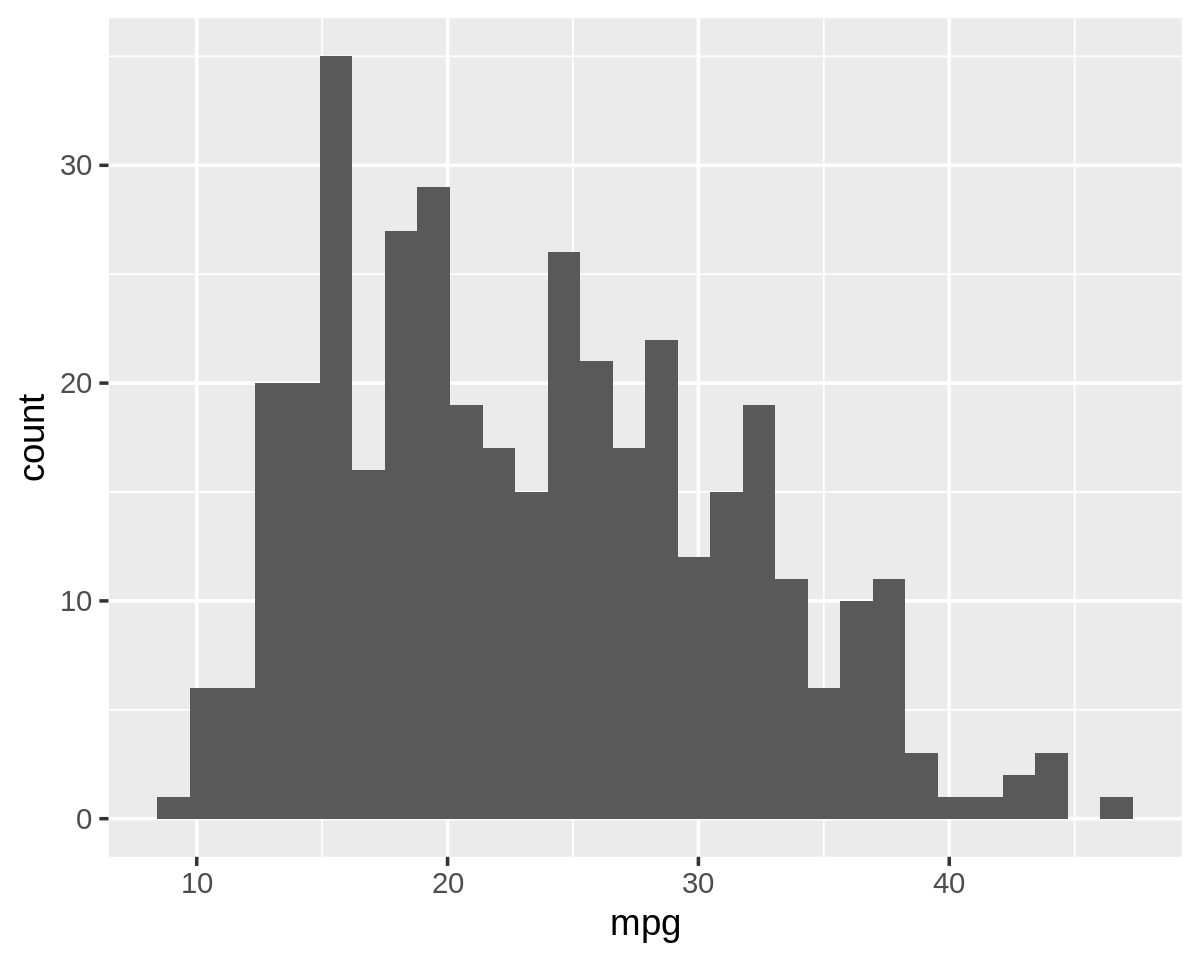

In [15]:
ggplot2::ggplot(dataframe,aes(x=mpg)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="3k8+yrH.)39)4NV])5@Y" x="-207" y="-4"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="g|=PD-J$iF25pWf.)HuX"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="d_{8yZ{O^g}?Wq:z13O["><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="#~JN)6)_wSse42|1{Z1^"><field name="CODE">aes(x=mpg)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="_nC:KL}(1R@-[r49RJIZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `mpg` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*It's pretty much bell shaped now, so I think it's fine.*

-------------------

Load `GGally` to make a scatter matrix.

In [ ]:
library(GGally)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="import_R" id=")6-sWg,OVSY*6|e3Bdg;" x="-244" y="-59"><field name="libraryName" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field></block></xml>

Use `GGally::ggpairs` to make a scatter matrix with the dataframe.

*Hint: also drop `name` because it has too many values and isn't useful*

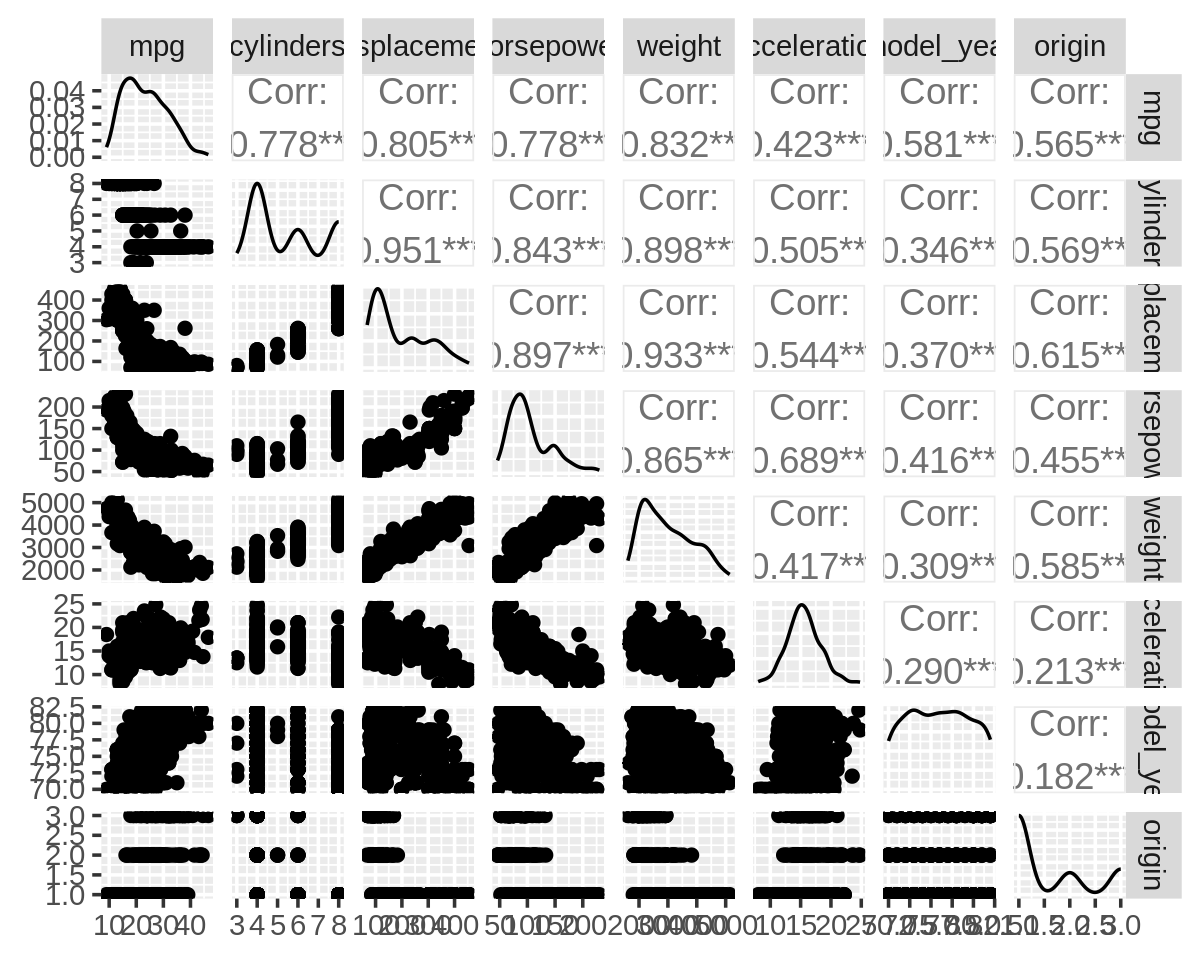

In [16]:
dataframe %>%
    dplyr::select(-name) %>%
    GGally::ggpairs()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="pipe_R" id="}wC%Vv;WrPYG)0o[vPs+" x="-203" y="63"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="z3SLzmZ|CtF.SVlj:D:P"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="s.l%6ZI*[RS6S8%pyiQG"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="Wx#F8CFBCP19?i%Sv+1o"><field name="CODE">-name</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="ioP~1S4U+?~Wt=f%+P,+"><mutation items="1"></mutation><field name="VAR" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field><field name="MEMBER">ggpairs</field><data>GGally:ggpairs</data></block></value></block></xml>

-----------------
**QUESTION:**

Looking at the scatterplot matrix, which variables have curved (nonlinear) relationships with `mpg`?

**ANSWER: (click here to edit)**

*Displacement, horsepower, weight, and acceration are curved*

--------------

**QUESTION:**

What do you think would be better for this data, linear regression or a regression tree? Why?

**ANSWER: (click here to edit)**

*A regression tree would probably be better because of the nonlinear relationships, which linear regression can't model*

-------------------

## Prepare train/test sets

First, load the package for splitting.

In [17]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="aFBwKpYz$V@3rI9Nk71a" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Split the data into train/test sets, using a seed of 2.

In [18]:
base::set.seed(2)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="Bs.?L_yk:!JU:!D9$e:2" x="-107" y="198"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="y3|#H:ii-(np[L}nH,7)"><field name="NUM">2</field></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
39.0,4,86,64,1875,16.4,81,1,plymouth champ
20.0,6,225,100,3651,17.7,76,1,dodge aspen se
17.7,6,231,165,3445,13.4,78,1,buick regal sport coupe (turbo)
20.3,5,131,103,2830,15.9,78,2,audi 5000
29.9,4,98,65,2380,20.7,81,1,ford escort 2h
28.0,4,97,75,2155,16.4,76,3,toyota corolla
25.0,6,181,110,2945,16.4,82,1,buick century limited
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
22.0,4,140,72,2408,19.0,71,1,chevrolet vega (sw)


## Fit models

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`

In [19]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Fit two models, a linear regression model and a regression tree model.

### Linear regression model 

Create the linear regression workflow to predict `mpg`, including a step to update the role of `name` to ID.

*Hint: `update_role(name,  new_role = "ID")`*

In [22]:
recipe = recipes::recipe(mpg ~ .,data = data_train) %>%
    recipes::update_role(name, new_role="ID")
model = parsnip::linear_reg() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("lm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">mpg ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">update_role</field><data>recipes:update_role</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="N3F}s%-T-c}.vd@vs9R{"><field name="CODE">name, new_role="ID"</field></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">lm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the linear regression workflow and get predictions for both train and test sets

In [23]:
model_linear = generics::fit(workflow,data = data_train)
data_evaluation_linear_train = generics::augment(model_linear,data_train)
data_evaluation_linear_test = generics::augment(model_linear,data_test)

data_evaluation_linear_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="^]4v5NZt+}z/-nsVw)@$">data_evaluation_linear_train</variable><variable id="=5.X/M+8=cpr0~KFPsl=">model_linear</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="ymc/cA4i#9|wz3wV3ug7">data_evaluation_linear_test</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="itv8%_JP399RG?(w-D?l" x="-184" y="-6"><field name="VAR" id="=5.X/M+8=cpr0~KFPsl=">model_linear</field><value name="VALUE"><block type="varDoMethod_R" id="5Z%,[]|xITF]I?XVE.28"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="7IjDYnp@/,sht+Y25)qj"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="gvTHnrEw8Y5rQ:;jG3e6"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU"><field name="VAR" id="^]4v5NZt+}z/-nsVw)@$">data_evaluation_linear_train</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="=5.X/M+8=cpr0~KFPsl=">model_linear</field></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></value></block></value><next><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF"><field name="VAR" id="ymc/cA4i#9|wz3wV3ug7">data_evaluation_linear_test</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="=5.X/M+8=cpr0~KFPsl=">model_linear</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id="^]4v5NZt+}z/-nsVw)@$">data_evaluation_linear_train</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
39.0,4,86,64,1875,16.4,81,1,plymouth champ,32.86313
20.0,6,225,100,3651,17.7,76,1,dodge aspen se,19.01098
17.7,6,231,165,3445,13.4,78,1,buick regal sport coupe (turbo),20.23261
20.3,5,131,103,2830,15.9,78,2,audi 5000,25.36430
29.9,4,98,65,2380,20.7,81,1,ford escort 2h,30.06696
28.0,4,97,75,2155,16.4,76,3,toyota corolla,29.86010
25.0,6,181,110,2945,16.4,82,1,buick century limited,26.70842
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
22.0,4,140,72,2408,19.0,71,1,chevrolet vega (sw),23.09806


### Regression tree model

Create the regression tree workflow using the last workflow as a template.

In [39]:
recipe = recipes::recipe(mpg ~ .,data = data_train) %>%
    recipes::update_role(name, new_role="ID")
model = parsnip::decision_tree(cost_complexity = .004) %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("rpart")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">mpg ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">update_role</field><data>recipes:update_role</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="N3F}s%-T-c}.vd@vs9R{"><field name="CODE">name, new_role="ID"</field></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">decision_tree</field><data>parsnip:decision_tree</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="GSnU*^AxcW3f~!WtPZkf"><field name="CODE">cost_complexity = .004</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">rpart</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the regression tree workflow and get predictions for both train and test sets.

In [40]:
model_regression_tree = generics::fit(workflow,data = data_train)
data_evaluation_regression_tree_train = generics::augment(model_regression_tree,data_train)
data_evaluation_regression_tree_test = generics::augment(model_regression_tree,data_test)

data_evaluation_regression_tree_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</variable><variable id="Yz3o%:y1.4yZ2lNpNqIx">data_evaluation_regression_tree_train</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="^{7DU,uMb,1v4`rMN_d6">data_evaluation_regression_tree_test</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="itv8%_JP399RG?(w-D?l" x="-184" y="-6"><field name="VAR" id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</field><value name="VALUE"><block type="varDoMethod_R" id="5Z%,[]|xITF]I?XVE.28"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="7IjDYnp@/,sht+Y25)qj"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="gvTHnrEw8Y5rQ:;jG3e6"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU"><field name="VAR" id="Yz3o%:y1.4yZ2lNpNqIx">data_evaluation_regression_tree_train</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</field></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></value></block></value><next><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF"><field name="VAR" id="^{7DU,uMb,1v4`rMN_d6">data_evaluation_regression_tree_test</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id="Yz3o%:y1.4yZ2lNpNqIx">data_evaluation_regression_tree_train</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
39.0,4,86,64,1875,16.4,81,1,plymouth champ,37.04500
20.0,6,225,100,3651,17.7,76,1,dodge aspen se,18.77143
17.7,6,231,165,3445,13.4,78,1,buick regal sport coupe (turbo),17.12667
20.3,5,131,103,2830,15.9,78,2,audi 5000,20.20714
29.9,4,98,65,2380,20.7,81,1,ford escort 2h,33.18889
28.0,4,97,75,2155,16.4,76,3,toyota corolla,25.52083
25.0,6,181,110,2945,16.4,82,1,buick century limited,27.58000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
22.0,4,140,72,2408,19.0,71,1,chevrolet vega (sw),23.50625


## Evaluate the models

First load yardstick to get performance metrics.

In [30]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For the linear regression model:

- Get the $r^2$ on the *training* set

In [31]:
yardstick::metrics(data_evaluation_linear_train,truth=mpg,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="^]4v5NZt+}z/-nsVw)@$">data_evaluation_linear_train</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id="^]4v5NZt+}z/-nsVw)@$">data_evaluation_linear_train</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.2299819
rsq,standard,0.8213067
mae,standard,2.4698814


- Get the $r^2$ on the *testing* set

In [32]:
yardstick::metrics(data_evaluation_linear_test,truth=mpg,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="ymc/cA4i#9|wz3wV3ug7">data_evaluation_linear_test</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id="ymc/cA4i#9|wz3wV3ug7">data_evaluation_linear_test</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.5604420
rsq,standard,0.8233109
mae,standard,2.5979864


For the regression tree model:

- Get the $r^2$ on the *training* set

In [41]:
yardstick::metrics(data_evaluation_regression_tree_train,truth=mpg,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="Yz3o%:y1.4yZ2lNpNqIx">data_evaluation_regression_tree_train</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id="Yz3o%:y1.4yZ2lNpNqIx">data_evaluation_regression_tree_train</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.6108735
rsq,standard,0.8832439
mae,standard,1.9719438


- Get the $r^2$ on the *testing* set

In [42]:
yardstick::metrics(data_evaluation_regression_tree_test,truth=mpg,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="^{7DU,uMb,1v4`rMN_d6">data_evaluation_regression_tree_test</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id="^{7DU,uMb,1v4`rMN_d6">data_evaluation_regression_tree_test</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.1243206
rsq,standard,0.8607734
mae,standard,2.2284721


------------------
**QUESTION:**

Compare the two models with respect to their *training data performance*. Which is better?
Now compare the two models with respect to their *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The regression tree model has a noticeably  better fit on the training data and testing data than the linear regression.*

-------------------

## Penalize the regression tree

In the regression tree workflow, change the penalty parameter away from the default below:

`decision_tree(cost_complexity = .01)`

Then run the workflow again and look at performance.

------------------
**QUESTION:**

What values did you try? Did any of them do better than linear regression on the test set?

**ANSWER: (click here to edit)**

*.004 is pretty close to as good performance as I got. Bigger values were worse*

-------------------

## Visualize the model

If you have time, try to do this for whatever value of `cost_complexity` you liked the best.

Load `rpart.plot` as a freestyle and update the plot size.

In [43]:
library(rpart.plot)

base::options(repr.plot.height = 7)

base::options(repr.plot.width = 7)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="dummyNoOutputCodeBlock_R" id="^;!%/[z.7tLAcWeV[e{#" x="-161" y="-69"><field name="CODE">library(rpart.plot)</field></block><block type="varDoMethod_R" id="M/hD0RBcNgb@40BJ@Ry0" x="-169" y="47"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="4Z:O$07IIfjkp}m7WU5Q"><field name="CODE">repr.plot.height = 7</field></block></value></block><block type="varDoMethod_R" id="eJGq*-prZ8N=XnjVZcjd" x="-170" y="125"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="FX4MxoW846AmGf}|rSD:"><field name="CODE">repr.plot.width = 7</field></block></value></block></xml>

Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:generics’:

    prune




Now create the plot using the regression tree model.

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


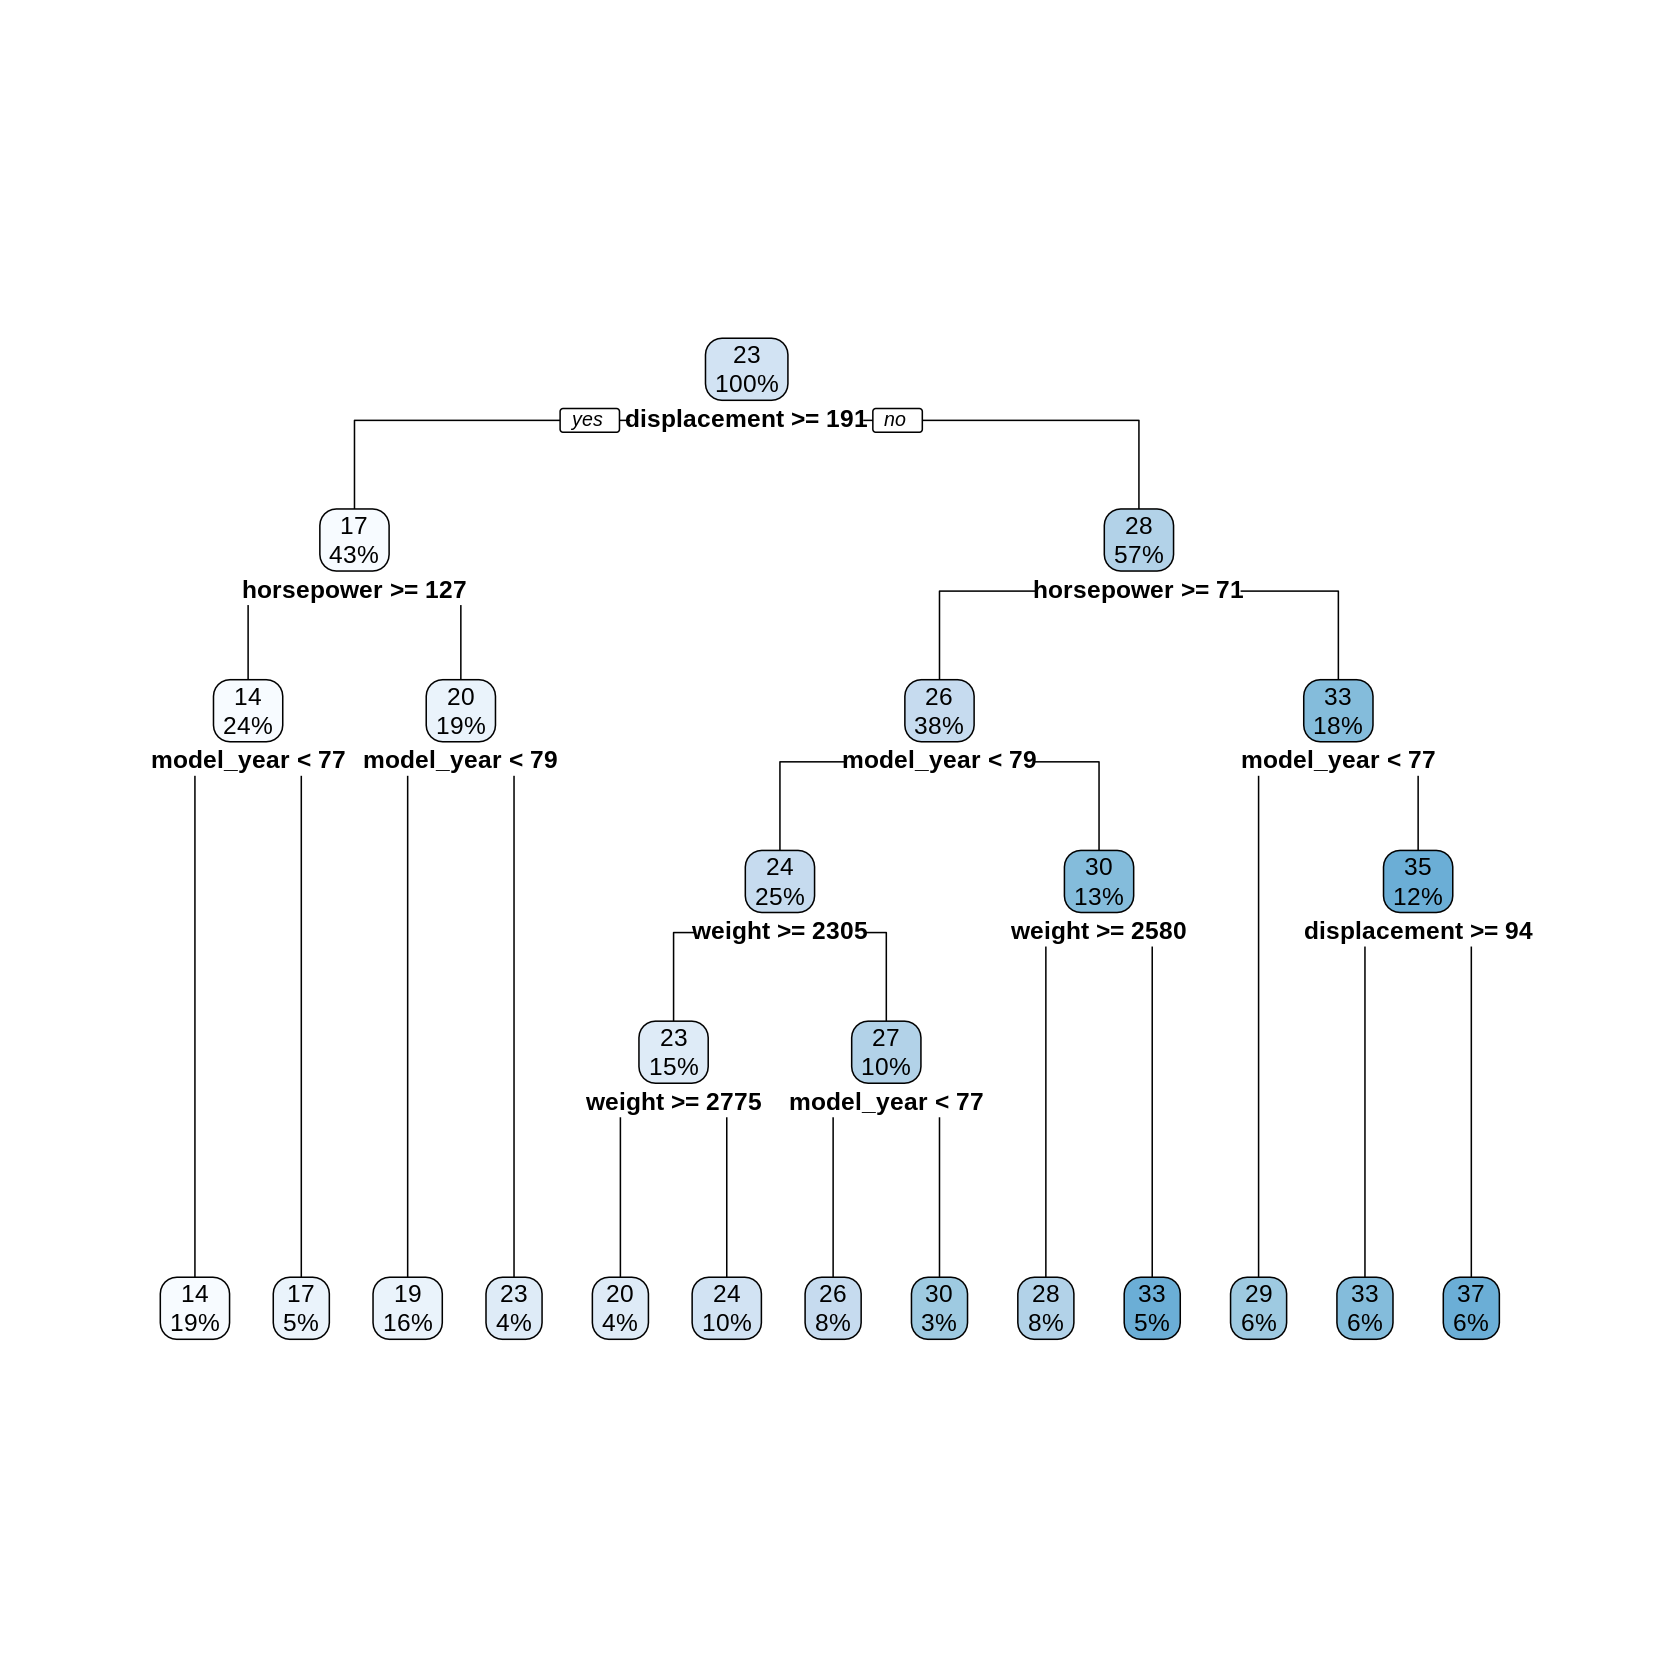

In [46]:
model_regression_tree %>%
    hardhat::extract_fit_engine() %>%
    rpart.plot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="pipe_R" id="67=ZV[vdO,.FoE!d07?w" x="-123" y="8"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="_gn,tq7t7wiA/1q0%B--"><field name="VAR" id="|})?/VRvTKNvj1R6?DIH">model_regression_tree</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="u!)8wOz=1YJ47h8mH52D"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="OH;{NKpO#b?!)7Gn6wd?"><field name="CODE">rpart.plot()</field></block></value></block></xml>

------------------
**QUESTION:**

Explain the top three nodes in your tree.

**ANSWER: (click here to edit)**

*If displacement (engine volume) is less than 191, see if horsepower is less than 71.
If displacement is bigger than 191, see if horsepower is < 127.
This seems to make sense because bigger engines will use more gas, and horsepower will use more gas
*

-------------------

**QUESTION:**

Which model do you prefer, linear regression or regression trees, in this situation, and why?

**ANSWER: (click here to edit)**

*Regression trees. They have a better fit that linear regression, and we know from the scatter matrix that displacement and horsepower are nonlinearly related to mpg.*

-------------------

<!--  -->

<!-- path = model.cost_complexity_pruning_path(splits[0], splits[2])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(splits[0], splits[2])
    clfs.append(clf)
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
px.scatter(x=ccp_alphas,y=node_counts) -->